# Histogramas y diagramas de densidad

En este cuaderno, veremos (https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf), que contiene información sobre más de 300 000 aviones que partieron de los aeropuertos de Nueva York en 2013. se centrará en visualizar la distribución de los retrasos de llegada dados en minutos.

Adaptado de :towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

In [1]:
# Importar
import pandas as pd
import numpy as np

# Matplotlib y  seaborn para gráficos
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.dpi'] = 200

import seaborn as sns

# No muestra warnings
import warnings
warnings.filterwarnings("ignore")

**Carga de datos y estructura de los datos**

In [2]:
flights = pd.read_csv('https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/formatted_flights.csv')

# Estructura de los datos

flights['arr_delay'].describe()

count    317113.000000
mean          1.297143
std          29.064401
min         -60.000000
25%         -17.000000
50%          -6.000000
75%          11.000000
max         120.000000
Name: arr_delay, dtype: float64

# Histograma de todos los retrasos

## Matplotlib

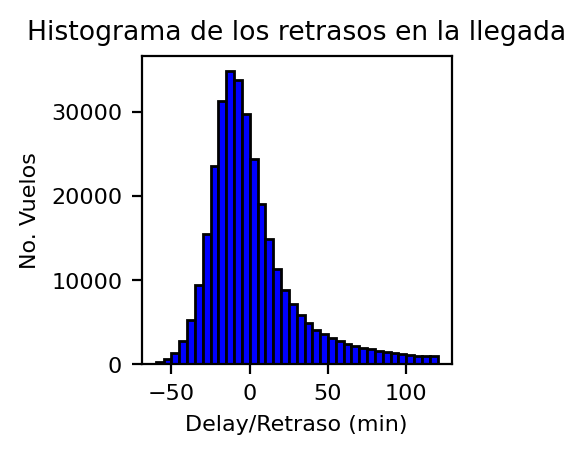

In [3]:
matplotlib.rcParams['figure.figsize'] = [2, 2]

#   histograma con matplotlib, bins debe ser entero

# vr min = -10 y máximo 160, el total es 180, el tamaño del bin es 5 180/5

plt.hist(flights['arr_delay'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# Configuramos la gráfica

plt.title('Histograma de los retrasos en la llegada')
plt.xlabel('Delay/Retraso (min)'); plt.ylabel('No. Vuelos');

## Seaborn

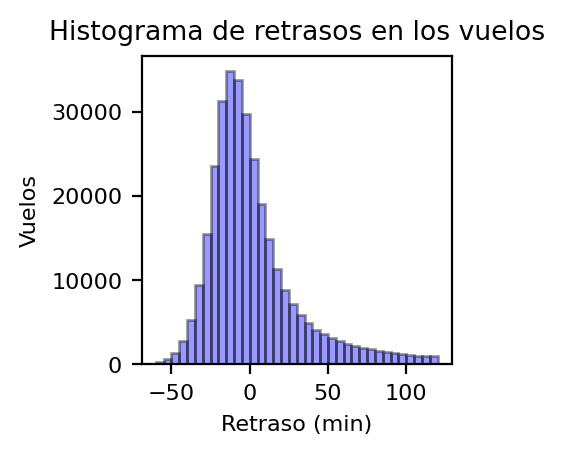

In [4]:

sns.distplot(flights['arr_delay'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Histograma de retrasos en los vuelos')
plt.xlabel('Retraso (min)'); plt.ylabel('Vuelos');


## Histograma con Ancho de los "bins" variable

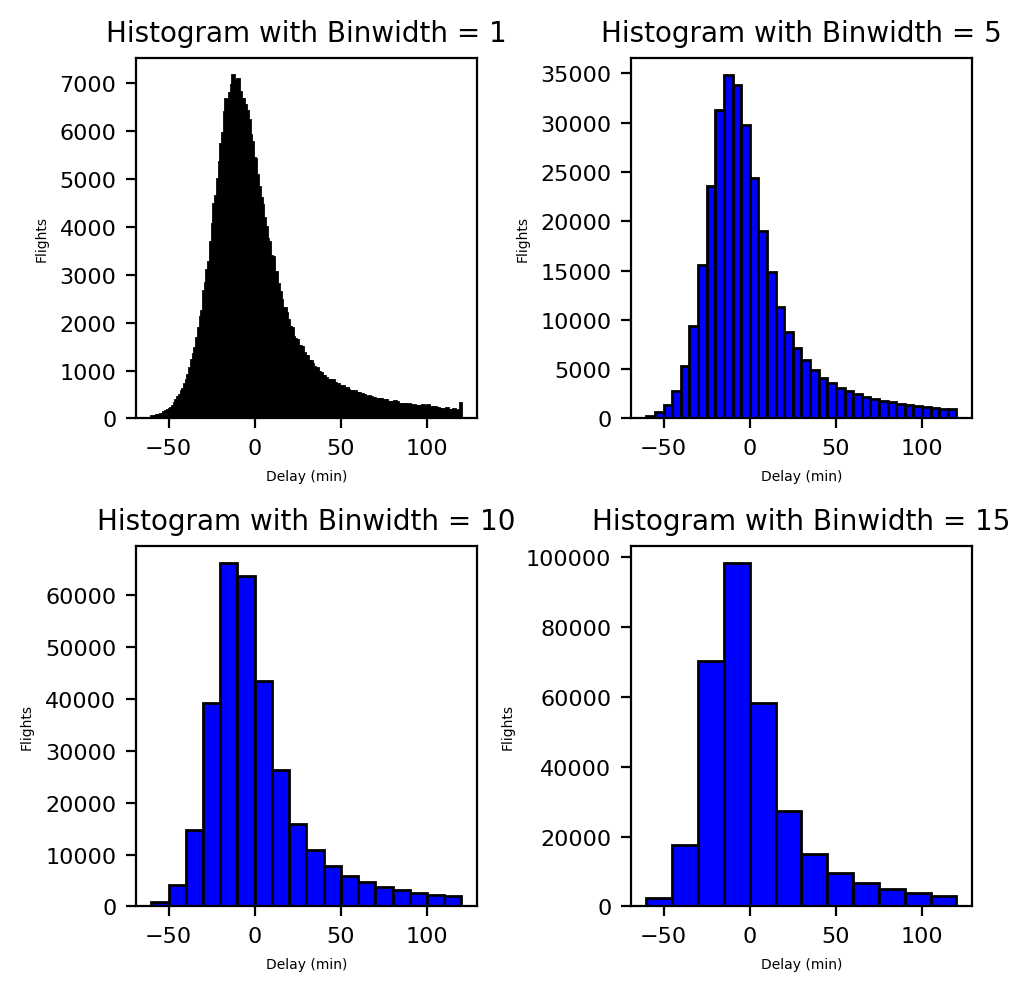

In [5]:
matplotlib.rcParams['figure.figsize'] = [5,5]

# Mostra 4 diferentes binwidths

for i, binwidth in enumerate([1, 5, 10, 15]):

    # Configura el diagrama
    ax = plt.subplot(2, 2, i + 1)

    # Genera el gráfico
    ax.hist(flights['arr_delay'], bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')

    # Título y etiquetas
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 10)
    ax.set_xlabel('Delay (min)', size = 5)
    ax.set_ylabel('Flights', size= 5)

plt.tight_layout()
plt.show()

# Donde fallan los histogramas: múltiples categorías

Los histogramas funcionan muy bien para mostrar una sola variable de una categoría (en este caso, la categoría eran todos los vuelos). Sin embargo, para mostrar varias categorías, un histograma no funciona bien porque los gráficos están oscurecidos.

In [6]:
# Extraer las cinco principales aerolíneas con la mayoría de los vuelos

carrier_flights = pd.Series(flights.groupby('name')['name'].count())
carrier_flights = carrier_flights.sort_values(ascending=False)
top_five = carrier_flights.index[:5]


# Subconjunto de las 5 principales aerolíneas

top_five_flights = flights[flights['name'].isin(top_five)]

In [7]:
top_five_flights

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.
...,...,...,...
317108,336765,-17.0,JetBlue Airways
317109,336766,-20.0,JetBlue Airways
317110,336767,-16.0,JetBlue Airways
317111,336768,1.0,JetBlue Airways


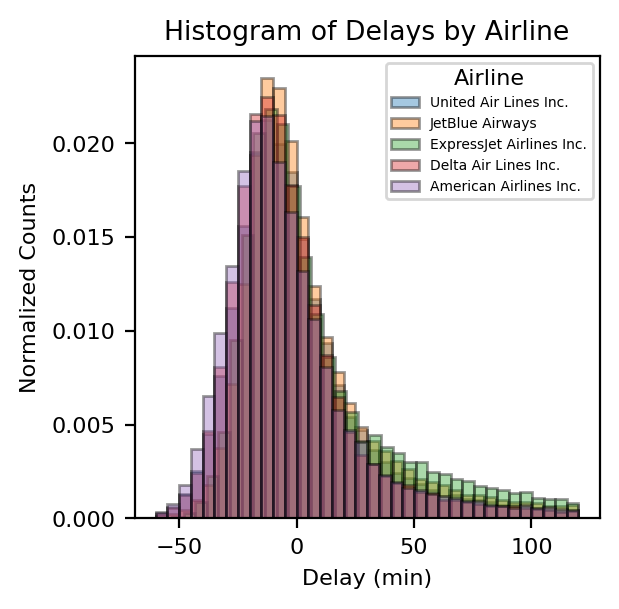

In [8]:
matplotlib.rcParams['figure.figsize'] = [3, 3]

# Iterate through each of the five airlines
for airline in top_five:
    # Subset to the airline
    subset = top_five_flights[top_five_flights['name'] == airline]
    # Make a histogram with the airline
    sns.distplot(subset['arr_delay'], bins = int(180/5),
                 label = airline, hist = True, kde = False,
                 norm_hist=True,
                 hist_kws = {'edgecolor': 'black'})

plt.legend(prop={'size': 5}, title = 'Airline')
plt.title('Histogram of Delays by Airline'); plt.xlabel('Delay (min)'); plt.ylabel('Normalized Counts');

In [9]:
# Crear una lista para cada airline

x1 = list(flights[flights['name'] == 'United Air Lines Inc.']['arr_delay'])
x2 = list(flights[flights['name'] == 'JetBlue Airways']['arr_delay'])
x3 = list(flights[flights['name'] == 'ExpressJet Airlines Inc.']['arr_delay'])
x4 = list(flights[flights['name'] == 'Delta Air Lines Inc.']['arr_delay'])
x5 = list(flights[flights['name'] == 'American Airlines Inc.']['arr_delay'])

# Asigne colores para cada aerolínea y los nombres

colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']

names = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

## Solucion 1: Histogramas Side-by-Side

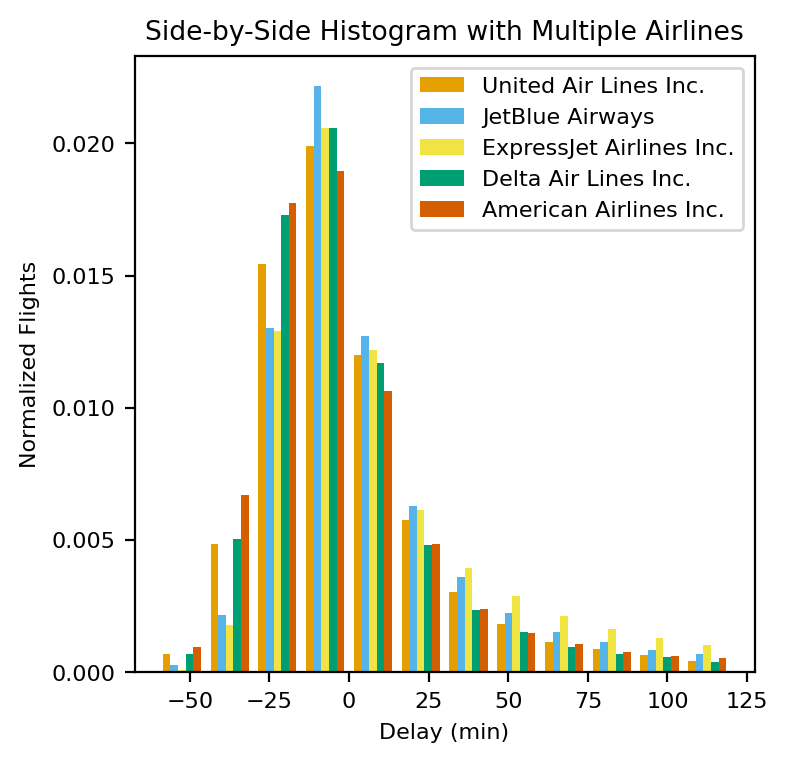

In [10]:
matplotlib.rcParams['figure.figsize'] = [4, 4]

# Make the histogram using a list of lists
#  Normalize and assign colors and names
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), density=True, color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Multiple Airlines');

## Solution 2: Stacked Histograms (Histogramas apilados)

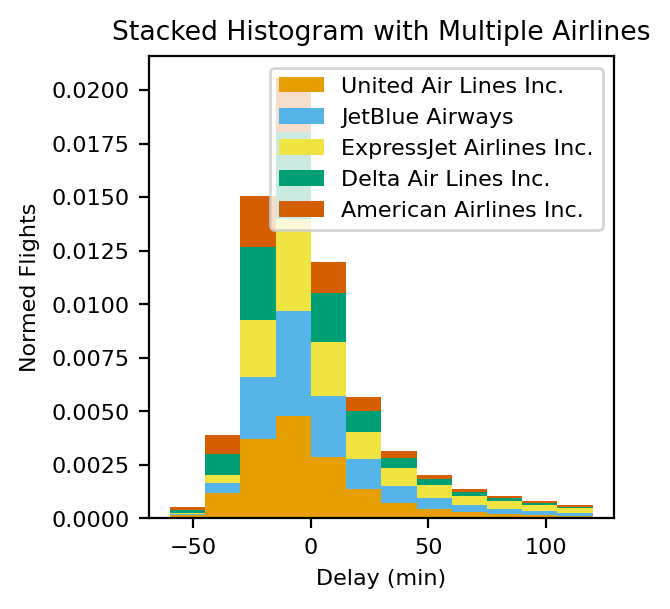

In [11]:
matplotlib.rcParams['figure.figsize'] = [3, 3]

plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), density=True, stacked=True,
         color = colors, label=names)

plt.legend(); plt.xlabel('Delay (min)'); plt.ylabel('Normed Flights');
plt.title('Stacked Histogram with Multiple Airlines');

# Solución 3: Gráficos de densidad

Un gráfico de densidad utiliza un núcleo (de forma predeterminada, un gaussiano) en cada punto de datos para crear una distribución y luego suma la distribución en cada ubicación para crear una única distribución.


Esto produce una versión suavizada de un histograma donde el eje y está en densidad. Esta densidad se puede considerar como una probabilidad de que el valor de los datos corresponda al valor en el eje x, pero esto puede crear problemas porque la densidad puede ser mayor que uno. Por lo general, solo lo considero como _densidad_, un valor que se usa solo con fines de comparación.

Más información en:
https://scikit-learn.org/stable/modules/density.html

## Gráfica de densidad de todos los retrasos usando Seaborn

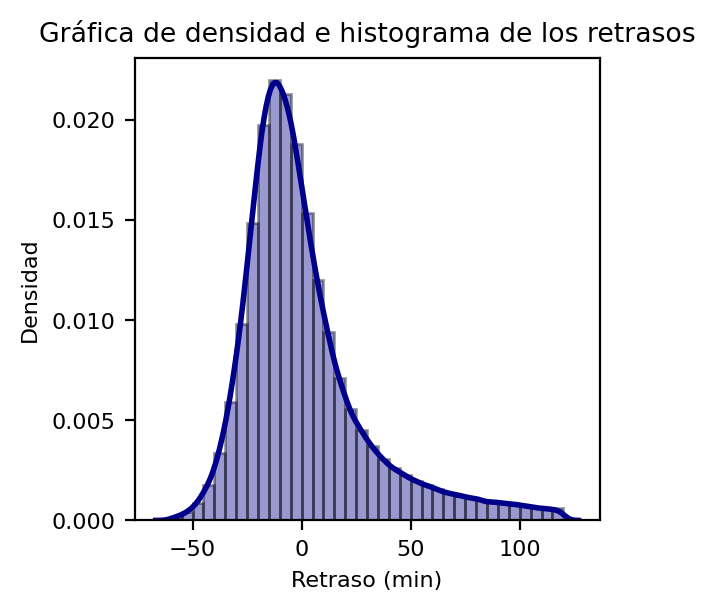

In [12]:
matplotlib.rcParams['figure.figsize'] = [3, 3]

sns.distplot(flights['arr_delay'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});

plt.title('Gráfica de densidad e histograma de los retrasos');
plt.xlabel('Retraso (min)'); plt.ylabel('Densidad');

# Gráfica de densidad con diferentes anchos de banda

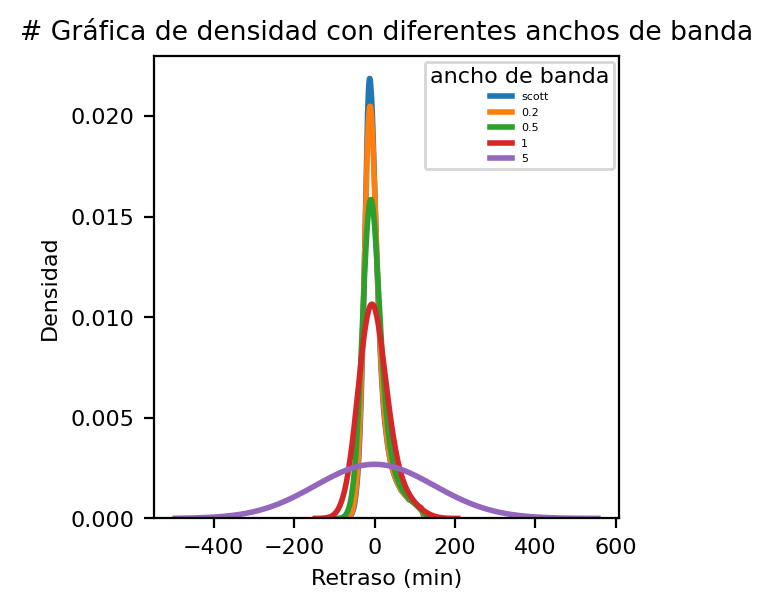

In [13]:
matplotlib.rcParams['figure.figsize'] = [3, 3]

for bandwidth in ['scott', 0.2, 0.5, 1, 5]:
    sns.distplot(flights['arr_delay'], hist = False, kde = True,
                 kde_kws={'bw': bandwidth, 'linewidth': 2},
                 label = bandwidth)

plt.legend(prop={'size': 4}, title = 'ancho de banda')
plt.title('# Gráfica de densidad con diferentes anchos de banda');
plt.xlabel('Retraso (min)'); plt.ylabel('Densidad');

## Kernels diferentes para el gráfico de densidad




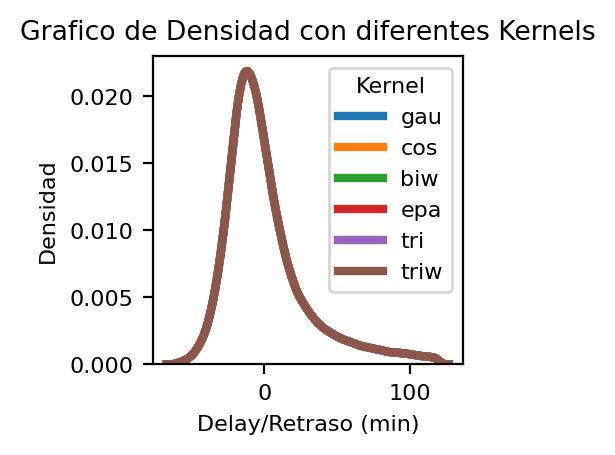

In [15]:
matplotlib.rcParams['figure.figsize'] = [2, 2]

for kernel in ['gau', 'cos', 'biw', 'epa', 'tri', 'triw']:
    sns.distplot(flights['arr_delay'], hist = False, kde = True,
                 kde_kws={'kernel': kernel, 'linewidth': 3},
                 label = kernel)

plt.legend(prop={'size': 8}, title = 'Kernel')
plt.title('Grafico de Densidad con diferentes Kernels');
plt.xlabel('Delay/Retraso (min)'); plt.ylabel('Densidad');

# Gráfica de densidad de retrasos de los cinco principales






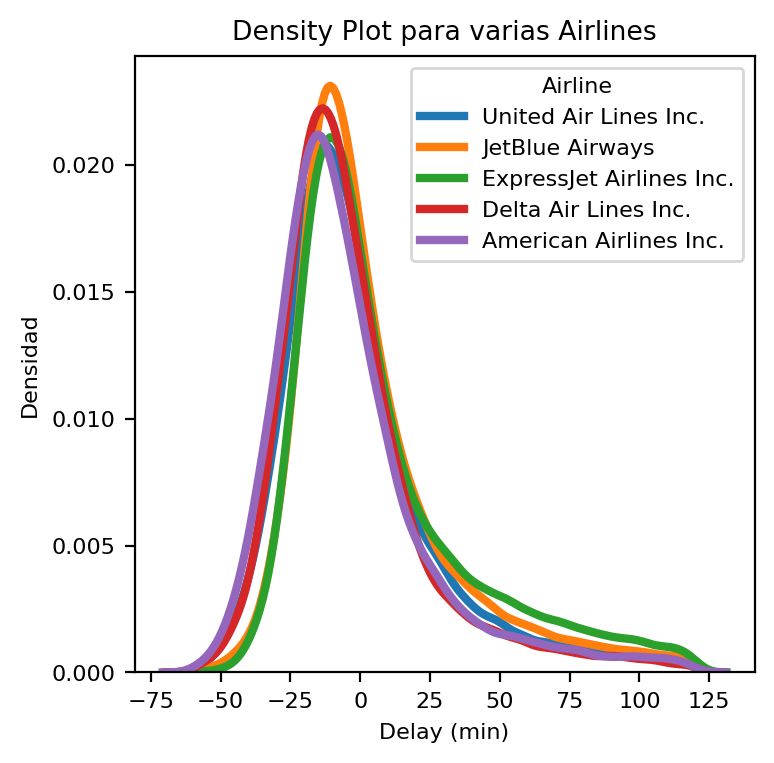

In [16]:
matplotlib.rcParams['figure.figsize'] = [4, 4]

# Lista de cinco aerolíneas para trazar
airlines = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

# Iterar a través de las cinco principales aerolíneas
for airline in airlines:
    # Subconjunto de la aerolínea
    subset = flights[flights['name'] == airline]


# Dibuja el diagrama de densidad
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)

plt.legend(prop={'size': 8}, title = 'Airline')
plt.title('Density Plot para varias Airlines');
plt.xlabel('Delay (min)')
plt.ylabel('Densidad');

## Gráfica de densidad sombreada

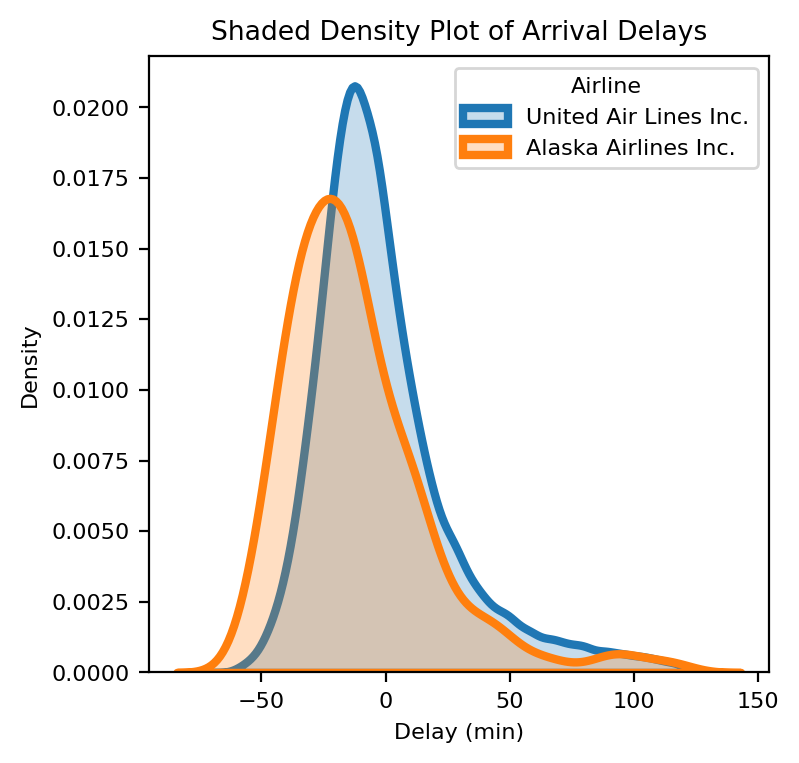

In [17]:
matplotlib.rcParams['figure.figsize'] = [4, 4]

for airline in ['United Air Lines Inc.', 'Alaska Airlines Inc.']:
    subset = flights[flights['name'] == airline]

    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = airline)

plt.legend(prop={'size': 8}, title = 'Airline')
plt.title('Shaded Density Plot of Arrival Delays');
plt.xlabel('Delay (min)'); plt.ylabel('Density');

## Densidad con Rug Plot (diagrama de alfombra)

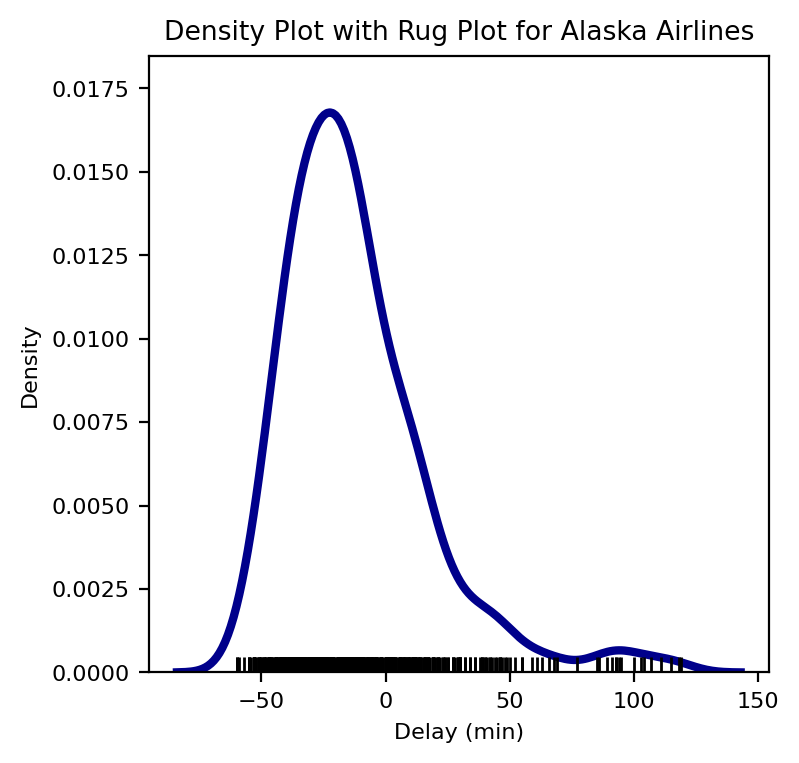

In [18]:
matplotlib.rcParams['figure.figsize'] = [4, 4]

# Subset to Alaska Airlines
subset = flights[flights['name'] == 'Alaska Airlines Inc.']

# Density Plot with Rug Plot
sns.distplot(subset['arr_delay'], hist = False, kde = True, rug = True,
             color = 'darkblue',
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})

# Plot formatting
plt.title('Density Plot with Rug Plot for Alaska Airlines');
plt.xlabel('Delay (min)'); plt.ylabel('Density');

# Ejercicio

Genere un grafico de densidad con una columna de un dataset propio y explique sus observaciones